## Aerofit Data analysis

lets import libraries 

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lets load the data

In [101]:
Aerofit_df = pd.read_csv('./data/aerofit_treadmill.csv')

In [102]:
Aerofit_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [114]:
Aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### More information about the data
lets find more information about the data


In [103]:
Aerofit_df.shape

(180, 9)

In [104]:
Aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


From the above table we can see that mean age of people in our dataset is 28 years and max is 50 years and minimum is 18 years and their average years of education is 15 years 
People in dataset will use the Machine used 3 times a week on a averge
But Income and miles has highes standard deviation

In [105]:
Aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Let us check for null Values

In [106]:
Aerofit_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

From the above analysis we can see that there is no null values in the dataset

#### which product has the highest market share

In [125]:
Aerofit_df['Product'].value_counts(normalize= True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

#### How many unique values are there in the dataset

In [126]:
Aerofit_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Doing the univariate analysis of the data

In [108]:
def univariate(D, x_cols: list):
    for items in x_cols:
        if items in ['Product', 'MaritalStatus', 'Gender','Education', 'Usage', 'Fitness']:
            plt.figure(figsize= (8,6))
            sns.countplot(data = D   , x = items, palette= 'Set2')
            plt.title(f'Distribution of {items} by count')
            plt.show()
        else:
            plt.figure(figsize= (8,6))
            sns.histplot(data = D   , x = items, kde= True)
            plt.title(f'Distribution of {items} by count')
            plt.xticks(rotation = 90)
            plt.show()


        

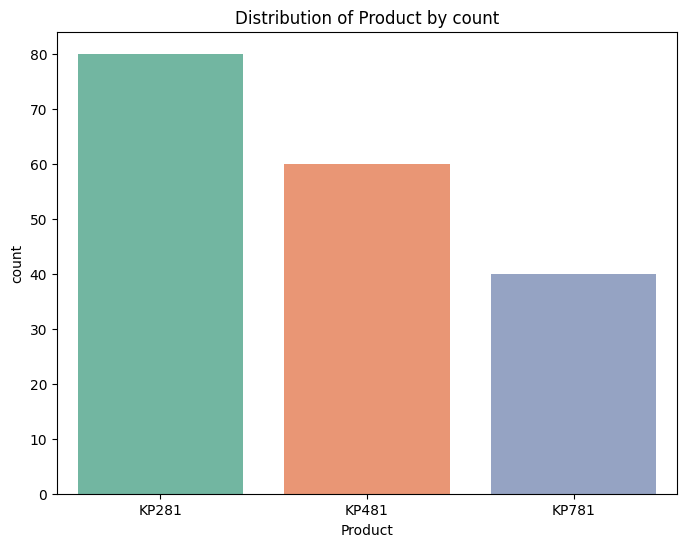

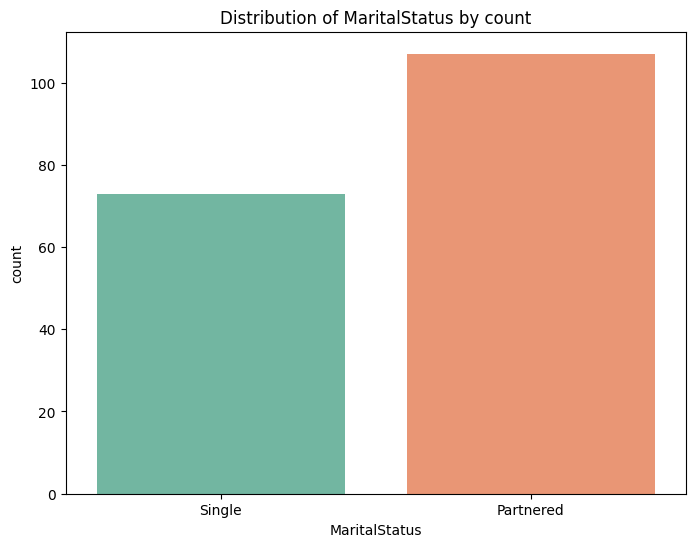

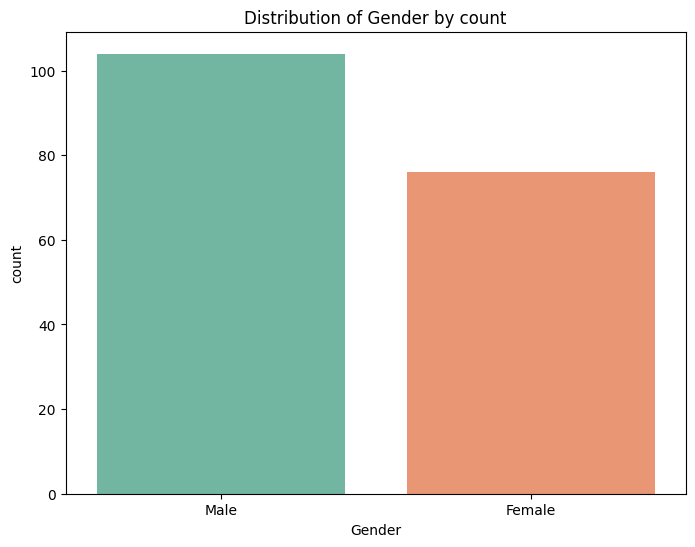

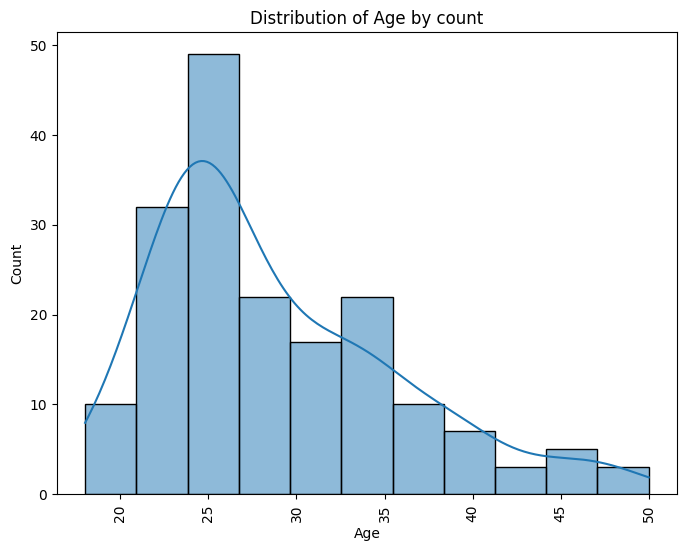

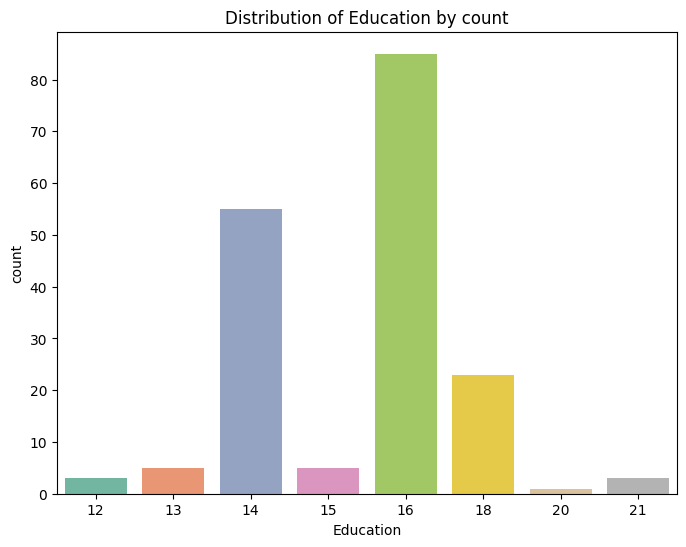

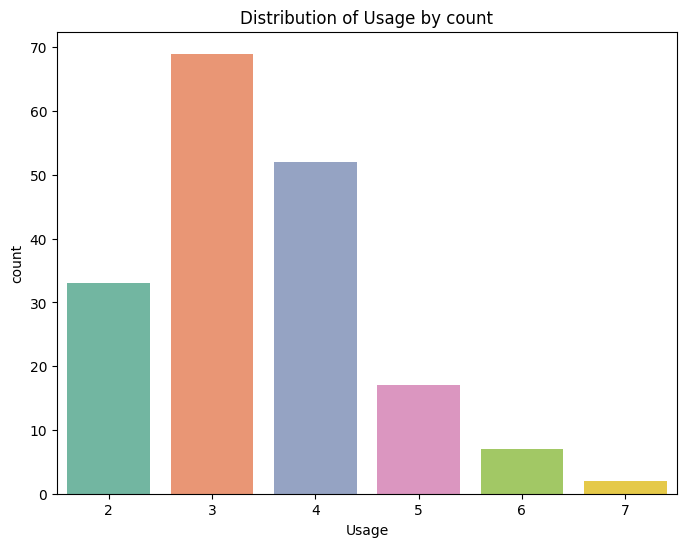

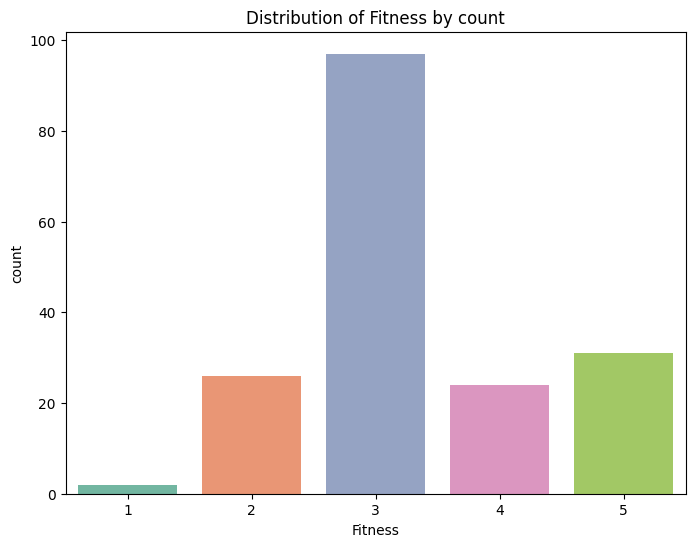

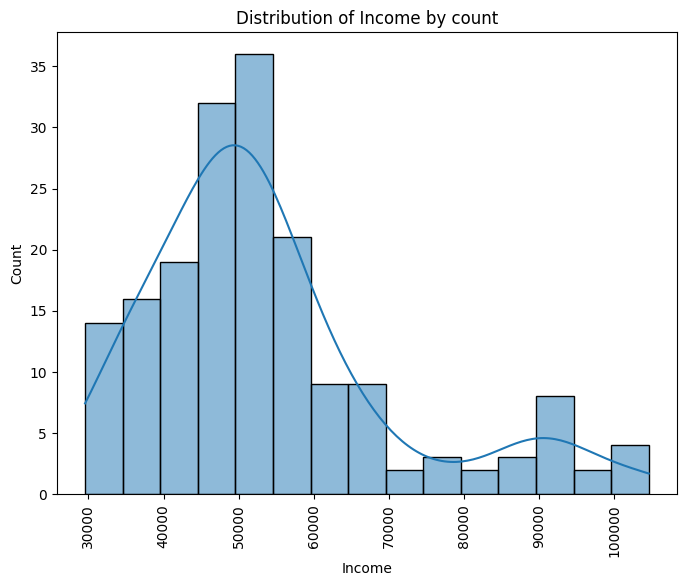

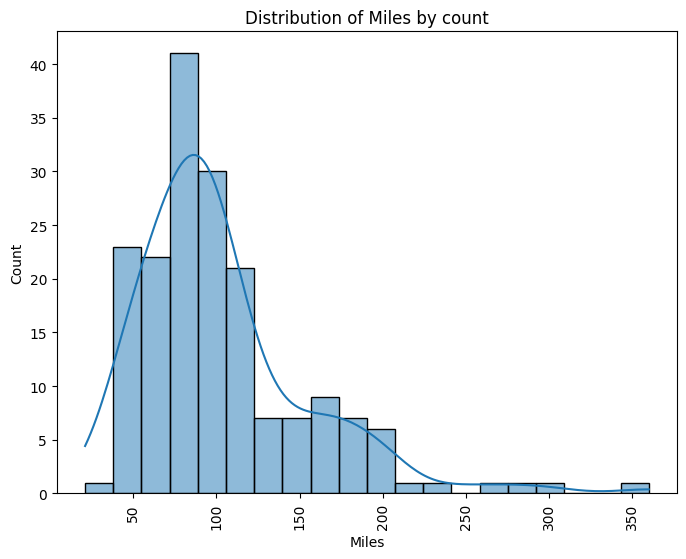

In [109]:
univariate(Aerofit_df, x_cols= ['Product', 'MaritalStatus',  'Gender', 'Age','Education',  'Usage',
       'Fitness', 'Income', 'Miles'])
      

From the above charts we can see that KP281 is more popular than the other two products.  Most customers are Males.
Partnerd people are buying treadmills more than single people.
People in the age group of 20 - 30 years buy the treadmill more. The same applies for people in the income range of 40000 - 60000. 
Maximum people have completed atleast 16 years of education. People with fitness level 3 are more into treadmills than others,
same with people who are planning to use it 3 times a week.
From the dataset we can see Miles range usually covered by people lies between 50-120 miles 


### Doing the Bivariate analysis of the data

Text(0.5, 1.0, 'Product Vs Fitness')

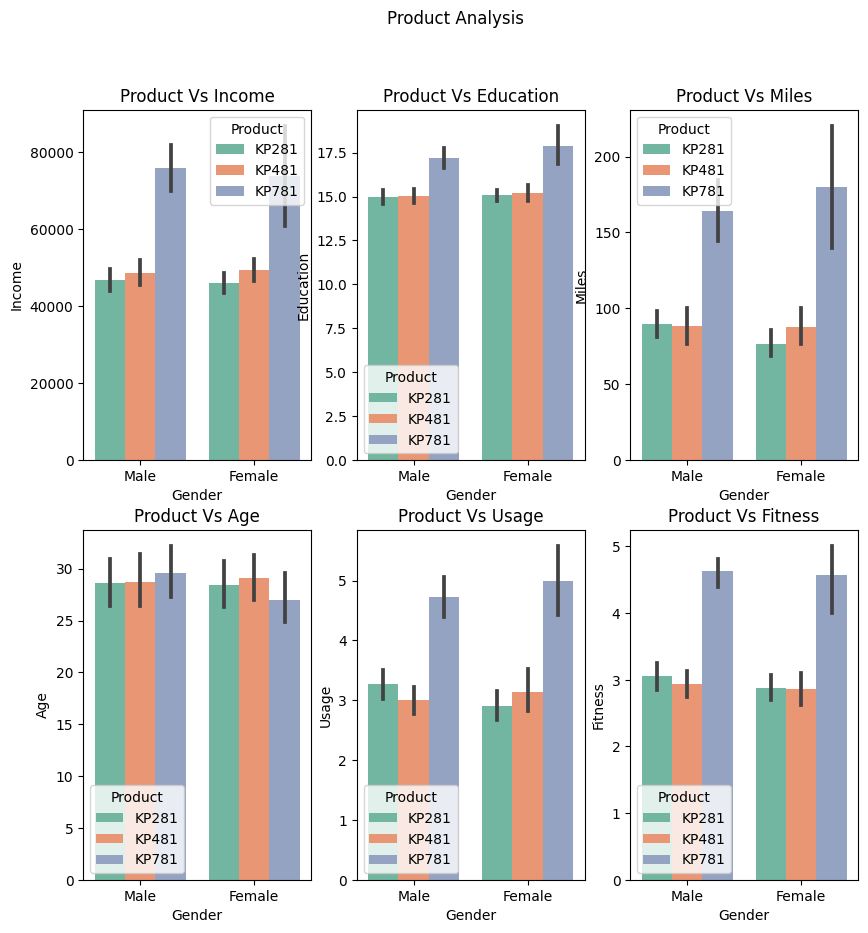

In [115]:
fig,axs = plt.subplots(2,3, figsize = (10,10))
fig.suptitle('Product Analysis ')
sns.barplot(ax= axs[0,0], x = Aerofit_df['Gender'],  y =Aerofit_df['Income'], hue= Aerofit_df['Product'], palette= "Set2")
axs[0,0].set_title('Product Vs Income')
sns.barplot(ax= axs[0,1],x = Aerofit_df['Gender'],  y =Aerofit_df['Education'], hue= Aerofit_df['Product'], palette= "Set2")
axs[0,1].set_title('Product Vs Education')
sns.barplot(ax= axs[1,0], x = Aerofit_df['Gender'],  y =Aerofit_df['Age'], hue= Aerofit_df['Product'],palette= "Set2")
axs[1,0].set_title('Product Vs Age')
sns.barplot(ax= axs[1,1],x = Aerofit_df['Gender'],  y =Aerofit_df['Usage'], hue= Aerofit_df['Product'], palette= "Set2")
axs[1,1] .set_title('Product Vs Usage')
sns.barplot(ax= axs[0,2],x = Aerofit_df['Gender'],  y =Aerofit_df['Miles'], hue= Aerofit_df['Product'], palette= "Set2")
axs[0,2] .set_title('Product Vs Miles')
sns.barplot(ax= axs[1,2],x = Aerofit_df['Gender'],  y =Aerofit_df['Fitness'], hue= Aerofit_df['Product'], palette= "Set2")
axs[1,2] .set_title('Product Vs Fitness')

#### From the above charts we can see that
People who have a fitness of 4-5 prefer product KP781 but people in fitness range of 0-3 prefer KP481 and KP281. Leaning more toward KP281. The same analysis applies for Usage. 
We see that female between the age of 25-30 prefer KP481 but for the same range male prefer KP781. People with higer income and more education prefer KP781. People who cover more miles prefer KP781



### Checking for outliers

Text(0.5, 1.0, 'Miles')

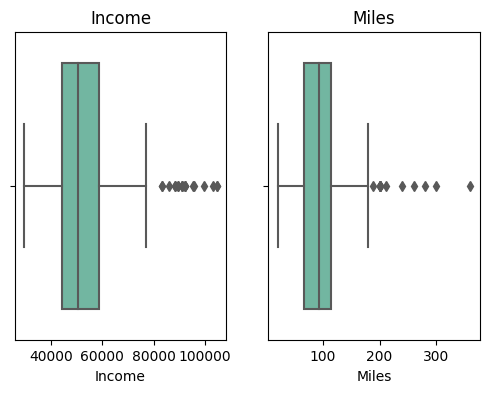

In [124]:
fig,axs = plt.subplots(1,2, figsize = (6,4))
sns.boxplot(ax= axs[0], x = Aerofit_df['Income'],  palette= "Set2")
axs[0].set_title('Income')
sns.boxplot(ax= axs[1],x = Aerofit_df['Miles'],  palette= "Set2")
axs[1].set_title('Miles')

From the above analysis we saw that the standard deviation of Income and Miles were the highest. So we are are checking for the outliers of these two parameters using the boxplot

In [116]:
Aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
